In [1]:
#Include all required packages and libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger


Using TensorFlow backend.


In [2]:
GOOGLE_COLAB = False
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
TEST_FILE = "test_file.txt"
MODEL_FILE = "model.h5"

In [3]:
if GOOGLE_COLAB:
    !pip install livelossplot
from livelossplot import PlotLossesKeras

In [4]:
# Data
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/image_classifier/"

In [5]:
training_data_dir = path + "data/training" # 10 000 * 2
validation_data_dir = path + "data/validation" # 2 500 * 2
test_data_dir = path + "data/test" # 12 500

In [6]:
# Hyperparams
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 10
BATCH_SIZE = 32
TEST_SIZE = 15

In [7]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [8]:
# Model 5
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

W0821 09:29:39.096561 140407411128128 deprecation_wrapper.py:119] From /home/anthony/miniconda3/envs/realpy3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/home/anthony/miniconda3/envs/realpy3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
W0821 09:29:39.110055 140407411128128 deprecation_wrapper.py:119] From /home/anthony/miniconda3/envs/realpy3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 09:29:39.112056 140407411128128 deprecation_wrapper.py:119] From /home/anthony/miniconda3/envs/realpy3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf

In [9]:
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

W0821 09:29:39.383623 140407411128128 deprecation_wrapper.py:119] From /home/anthony/miniconda3/envs/realpy3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 09:29:39.390135 140407411128128 deprecation_wrapper.py:119] From /home/anthony/miniconda3/envs/realpy3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0821 09:29:39.396336 140407411128128 deprecation.py:323] From /home/anthony/miniconda3/envs/realpy3/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

In [11]:
# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

In [12]:
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)
#test_data_generator = ImageDataGenerator()

In [13]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")

Found 20000 images belonging to 2 classes.


In [14]:
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")

Found 5000 images belonging to 2 classes.


In [15]:
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 12500 images belonging to 1 classes.


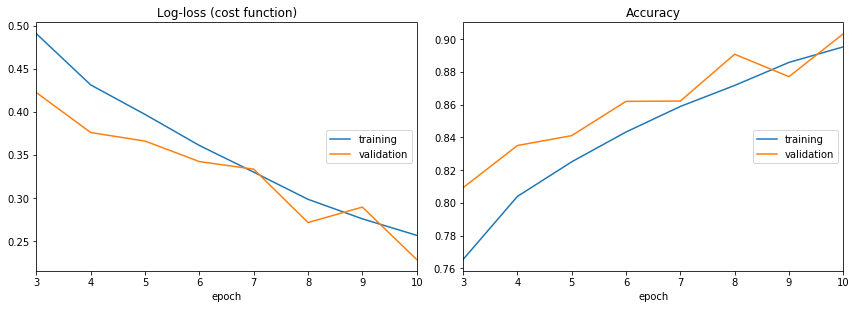

Log-loss (cost function):
training   (min:    0.256, max:    0.649, cur:    0.256)
validation (min:    0.228, max:    0.965, cur:    0.228)

Accuracy:
training   (min:    0.603, max:    0.895, cur:    0.895)
validation (min:    0.547, max:    0.903, cur:    0.903)


In [16]:
# Training
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames)//BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames)//BATCH_SIZE,
    callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,append=False,separator=";")], 
    verbose=1)

In [17]:
model.save(MODEL_FILE)

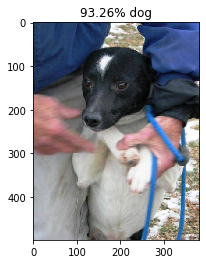

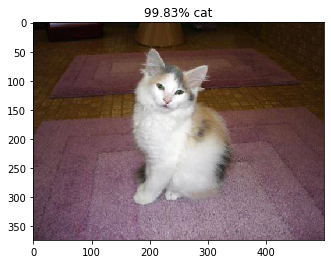

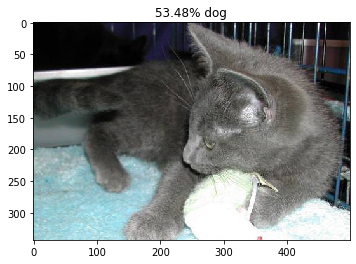

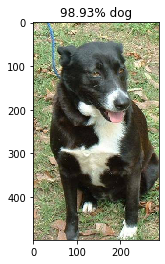

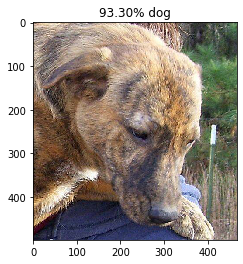

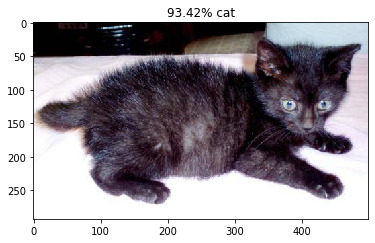

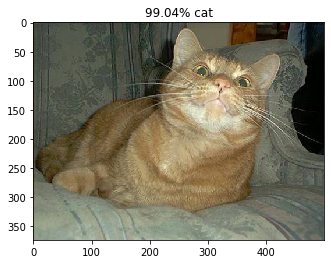

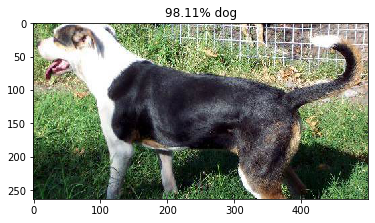

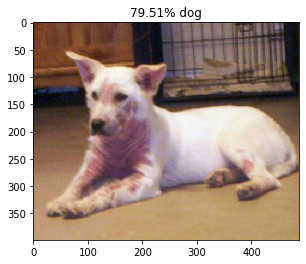

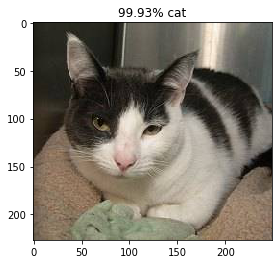

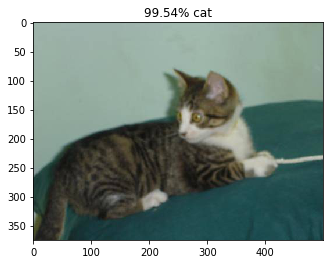

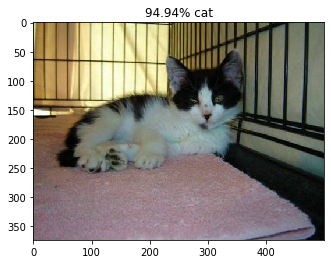

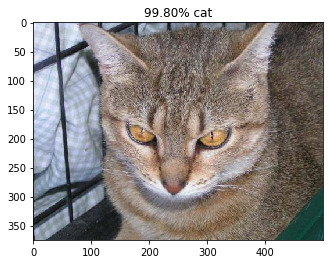

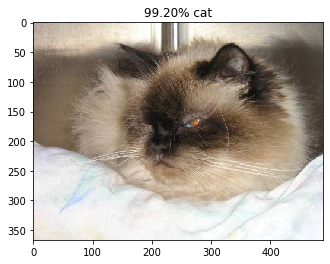

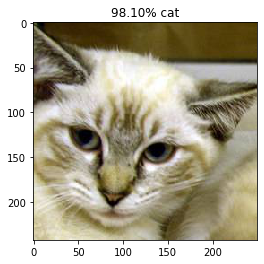

In [18]:
# Testing
open(TEST_FILE,"w")
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    with open(TEST_FILE,"a") as fh:
        fh.write(str(probability[0]) + " for: " + image_path + "\n")
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()

In [19]:
#if GOOGLE_COLAB:
#    files.download(MODEL_SUMMARY_FILE)
#    files.download(MODEL_FILE)
#    files.download(TRAINING_LOGS_FILE)
#    files.download(TEST_FILE)

In [20]:
#import numpy as np
#from keras.preprocessing import image

In [31]:
#img = image.load_img('/content/drive/My Drive/image_classifier2/data/test/testclass/12486.jpg', target_size=(200,200))
#data/test/testclass/12491
new_test_data_generator = ImageDataGenerator(rescale=1./255)

new_test_generator = new_test_data_generator.flow_from_directory(
    'new_test_data/',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 4 images belonging to 1 classes.


In [32]:
probabilities = model.predict_generator(new_test_generator, 4)
probabilities

array([[0.00904951],
       [0.9923515 ],
       [0.00410482],
       [0.99420714]], dtype=float32)

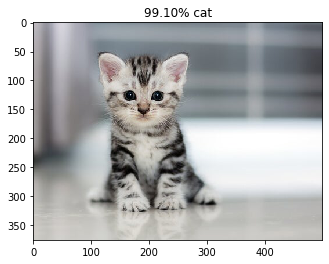

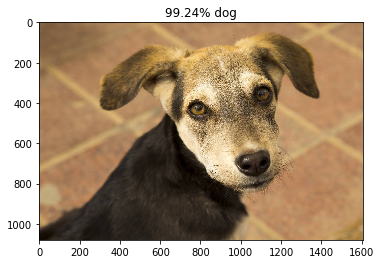

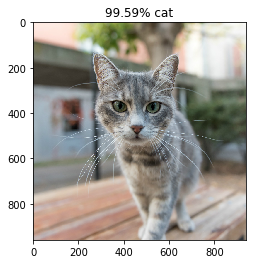

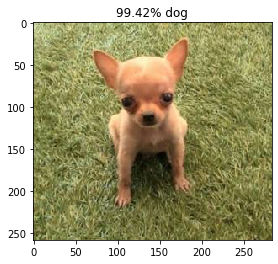

In [33]:
for index, probability in enumerate(probabilities):
    image_path = 'new_test_data' + "/" + new_test_generator.filenames[index]
    img = mpimg.imread(image_path)
    with open(TEST_FILE,"a") as fh:
        fh.write(str(probability[0]) + " for: " + image_path + "\n")
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()

In [73]:
import numpy as np
from keras.preprocessing import image
img = image.load_img('new_test_data/new_class/3.jpg', target_size=(200,200))

In [74]:
arr_img = image.img_to_array(img)
arr_img = np.expand_dims(arr_img, axis=0)
arr_img = arr_img.astype('float32')
arr_img/= 255

In [75]:
from keras.models import load_model
model1 = load_model('model.h5')

In [76]:
prob = model1.predict_proba(arr_img)

In [77]:
prob

array([[0.00410482]], dtype=float32)

In [78]:
model.save_weights(MODEL_FILE)